### Контекст
##### Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
##### Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## План исследования<a class="anchor" id="chapter20"></a>

### [Шаг 1. Импортирование данных](#chapter0)

### [Шаг 2. Приоритизация гипотез.](#chapter1)
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
###### Задача
- [Фреймворк ICE для приоритизации гипотез.](#chapter2)

- [Фреймворк RICE для приоритизации гипотез.](#chapter3)

- [Как изменилась приоритизация гипотез при применении RICE вместо ICE.](#chapter4)

### [Шаг 3. Анализ A/B-теста](#chapter5)
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

###### Задача
###### Проанализируйте A/B-тест:


- [График кумулятивной выручки по группам.](#chapter6)

- [График кумулятивного среднего чека по группам.](#chapter7)

- [График относительного изменения кумулятивного среднего чека группы B к группе A.](#chapter8)

- [График кумулятивной конверсии по группам.](#chapter9)

- [График относительного изменения кумулятивной конверсии группы B к группе A.](#chapter10)

- [Точечный график количества заказов по пользователям.](#chapter11)

- [95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей](#chapter12)

- [Точечный график стоимостей заказов.](#chapter13)

- [95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.](#chapter14)

- [Статистическая значимость различий в конверсии между группами по «сырым» данным.](#chapter15)

- [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.](#chapter16)

- [Статистическая значимость различий в конверсии между группами по «очищенным» данным.](#chapter17)

- [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.](#chapter18)

- [Решение по результатам теста.](#chapter19)

### Описание данных

Данные для первой части
Файл /datasets/hypothesis.csv:

- <b>Hypothesis</b> — краткое описание гипотезы;
- <b>Reach</b> — охват пользователей по 10-балльной шкале;
- <b>Impact</b> — влияние на пользователей по 10-балльной шкале;
- <b>Confidence</b> — уверенность в гипотезе по 10-балльной шкале;
- <b>Efforts</b> — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл /datasets/orders.csv:

- <b>transactionId</b> — идентификатор заказа;
- <b>visitorId</b> — идентификатор пользователя, совершившего заказ;
- <b>date</b> — дата, когда был совершён заказ;
- <b>revenue</b> — выручка заказа;
- <b>group</b> — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

- <b>date</b> — дата;
- <b>group</b> — группа A/B-теста;
- <b>visitors</b> — количество пользователей в указанную дату в указанной группе A/B-теста

### Шаг 1. Импортирование данных<a class="anchor" id="chapter0"></a>

#### Загрузка библиотек

In [1]:
import pandas as pd              
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st

#### Загрузка датасетов¶

In [2]:
#гипотезы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')  
#заказы
orders = pd.read_csv('/datasets/orders.csv')          
#посещения
visitors = pd.read_csv('/datasets/visitors.csv')      

Изучим данные в датасетах.

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Пропущенных значений нет.

В таблицах orders и visits изменим тип данных на корректный


In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
#проверим данные на дубликаты
print('Дубликатов в таблице orders: {}'.format(orders.duplicated().sum()))
print('Дубликатов в таблице visitors: {}'.format(visitors.duplicated().sum()))

Дубликатов в таблице orders: 0
Дубликатов в таблице visitors: 0


*_[К оглавлению](#chapter20)_*

### Шаг 2. Приоритизация гипотез.<a class="anchor" id="chapter1"></a>

##### Фреймворк ICE для приоритизации гипотез.<a class="anchor" id="chapter2"></a>

Формула для расчёта выглядит как <b>ICE SCORE = Impact * Confidence / Efforts</b> 

In [11]:
#рассчитаем ICE
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [12]:
#итоговая таблицa
hypothesis.sort_values('ICE', ascending=False)
pd.set_option('display.max_colwidth', -1)
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000


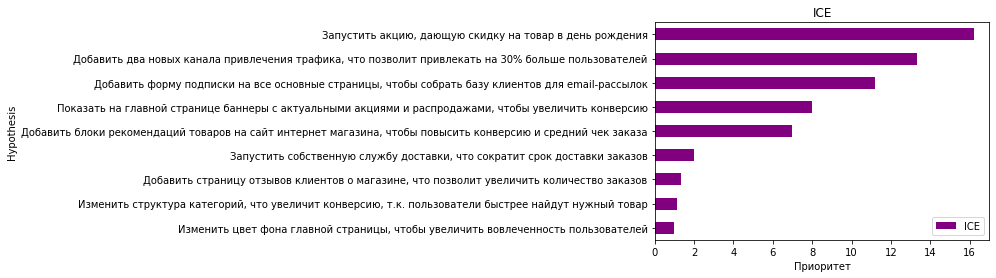

In [13]:
#построим гистограмму
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh', 
                                                                                                       color='purple')
ax.set_xlabel('Приоритет')
ax.set_title('ICE')
plt.show()

*_[К оглавлению](#chapter20)_*

##### Фреймворк RICE для приоритизации гипотез.<a class="anchor" id="chapter3"></a>

Формула для расчёта выглядит как <b>RICE SCORE = Reach * Impact * Confidence / Efforts</b>

In [14]:
#рассчитаем RICE
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [15]:
hypothesis.sort_values('RICE', ascending=False)
pd.set_option('display.max_colwidth', -1)
hypothesis.head(10) 

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


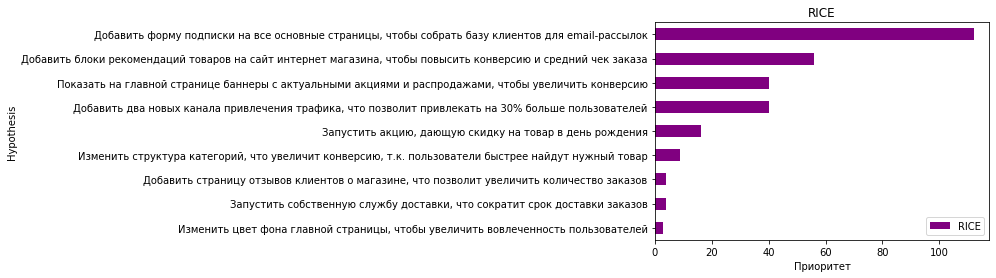

In [16]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh', color='purple')
ax.set_xlabel('Приоритет')
ax.set_title('RICE')
plt.show()

##### <span style="color:blue">Как изменилась приоритизация гипотез при применении RICE вместо ICE. Вывод.</span> <a class="anchor" id="chapter4"></a>

*_<span style="color:blue">По фреймворку ICE наибольшую оценку имели гпиотезы 8, 0 и 7. После применения фреймворка RICE приоритеты изменились на гипотезы 7, 2 и 0. Различия в приоритизации гипотез получились в связи с тем, что фреймворк RICE учитывает ещё один дополнительный параметр гипотезы <b>Reach</b> (охват пользователей). Т.е. параметр охвата, использующийся в методе RICE изменил всю приоритетность. Опишем подробнее:</span>_*

- <span style="color:blue">без учета охвата на первом месте идет акция со скидкой имениннику, но параметр Reach понизил приоритет этой акции, т.к. охват её минимальный;</span>
- <span style="color:blue">также произошло и с гипотезой о добавлении каналов трафика, с организацией своей службы доставки и с идеей о добавлении страницы отзывов;</span>
- <span style="color:blue">без изменений остались позиции гипотез о добавлении баннеров с актуальными акциями на главную страницу и идея с изменением цвета фона главной страницы;</span>
- <span style="color:blue">выросли в рейтинге RICE (по сравнению с ICE) гипотеза о добавлении формы подписки на все основные страницы ресурса и о добавлении блоков рекомендаций товаров и предложение об изменении структуры категорий.</span>

*_[К оглавлению](#chapter20)_*

### Шаг 3. Анализ A/B-теста<a class="anchor" id="chapter5"></a>

##### График кумулятивной выручки по группам.<a class="anchor" id="chapter6"></a>

In [17]:
#df с уникальными значениями
datesGroups = orders[['date','group']].drop_duplicates()

In [18]:
#создадим df с агрегированными кумулятивными данными о заказах по дням 
#и отсортируем результаты по столбцам 'date' и 'group'
ordersAggregated = (
    datesGroups
    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] 
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group']) 
)

In [19]:
#аналогично создадим df с агрегированными кумулятивными данными о посетителях по дням 
#и отсортируем результаты по столбцам 'date' и 'group'
visitorsAggregated = (
    datesGroups 
    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)

In [20]:
#смержим ordersAggregated и visitorsAggregated
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [21]:
cumulativeData.head()

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [22]:
#кумулятивная выручка по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue']]

In [23]:
#кумулятивная выручка по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue']]

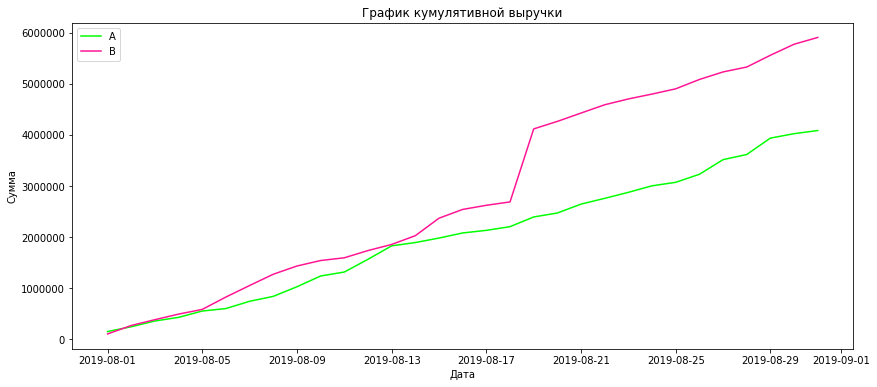

In [24]:
#график для группы A
plt.figure(figsize=(14,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color = 'lime')
#график для группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color = 'deeppink')
plt.title('График кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend()
plt.show()

*_<span style="color:blue">В течение всего периода график кумулятивной выручки группы B лежит выше, чем график кумулятивной выручки группы A.
Получается, что пользователи, посещающие сайт в группе B, приносят больше денег.  
Подобное явление может быть обусловлено двумя факторами: 1. C августа в группе В происходит значительный рост количества продаж. 2. В группе В значительно увеличивается средний чек. Чтобы определить причину такого значительного роста кумулятивной выручки необходимо продолжить исследования.</span>_*

*_[К оглавлению](#chapter20)_*

##### График кумулятивного среднего чека по группам.<a class="anchor" id="chapter7"></a>

In [25]:
#кумулятивная выручкой по дням для группы А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactionId']]

In [26]:
#кумулятивная выручкой по дням для группы B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactionId']]

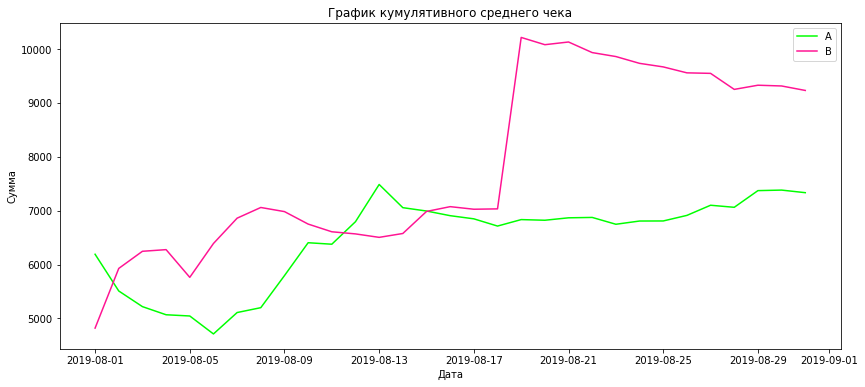

In [27]:
# График кумулятивного среднего чека для группы A
plt.figure(figsize=(14,6)) # Размер графика
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactionId'], label='A', 
         color = 'lime')
# График кумулятивного среднего чека для группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactionId'], label='B', 
         color = 'deeppink')
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Сумма')
plt.legend()
plt.show()

*_<span style="color:blue">Как видно на графике, средний чек в группе B почти всё время был выше, но нас смущает его резкое колебание во второй половине графика, есть вероятность что оно обусловлено аномалиями.</span>_*

*_[К оглавлению](#chapter20)_*

##### График относительного изменения кумулятивного среднего чека группы B к группе A.<a class="anchor" id="chapter8"></a>

In [28]:
#кумулятивный средний чека для групп A и B
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])

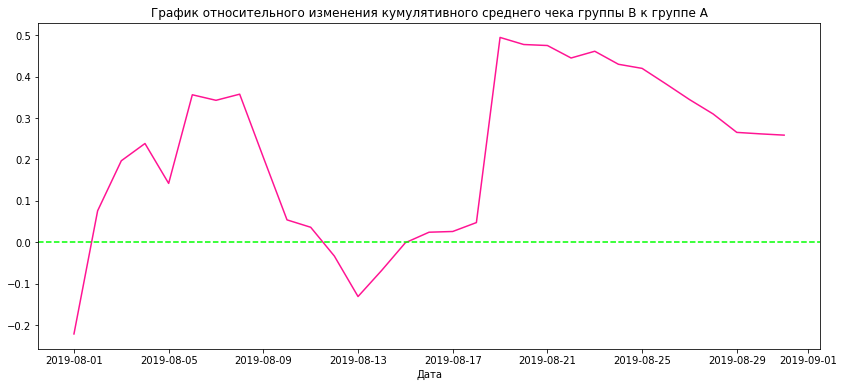

In [29]:
#строим график 
plt.figure(figsize=(14,6))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionIdB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionIdA'])-1, color ='deeppink')

plt.axhline(y=0, color='lime', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.show()

*_<span style="color:blue">Начиная с первых дней теста средний чек в группе В уверенно увеличивался вплоть до 8 августа.  
После этого средний чек в группе В начал стремительно падать и стал ниже среднего чека группы А чуть более, чем на 10%  
И с 18 августа увеличивается почти на 50% по отношению к среднему чеку группы А, а после начинает постепенно снижаться.  
Как было упомянуто выше, колебания слишком резкие, необходимо будет проверить данные на наличие аномальных пользователей.</span>_*

*_[К оглавлению](#chapter20)_*

##### График кумулятивной конверсии по группам.<a class="anchor" id="chapter9"></a>

In [30]:
#кумулятивная конверсия
cumulativeData['conversion'] = cumulativeData['transactionId']/cumulativeData['visitors']

In [31]:
#группa A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
#группa B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

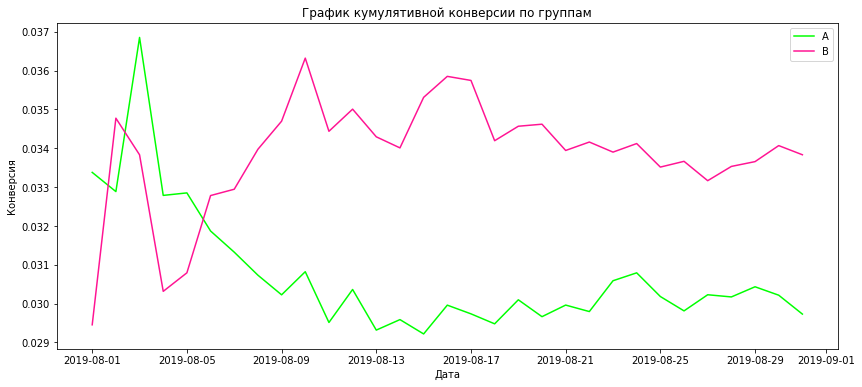

In [32]:
#строим график
plt.figure(figsize=(14,6))
plt.title('График кумулятивной конверсии по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color='lime')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color='deeppink')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

*_<span style="color:blue">График свидетельствует о значительном различии конверсии где-то после 6 августа. Группа B стабильно показывает большую конверсию чем группа A.</span>_*

*_[К оглавлению](#chapter20)_*

##### График относительного изменения кумулятивной конверсии группы B к группе A.<a class="anchor" id="chapter10"></a>

In [33]:
#объединяем датафреймы
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', 
                                                                           how='left', suffixes=['A', 'B'])

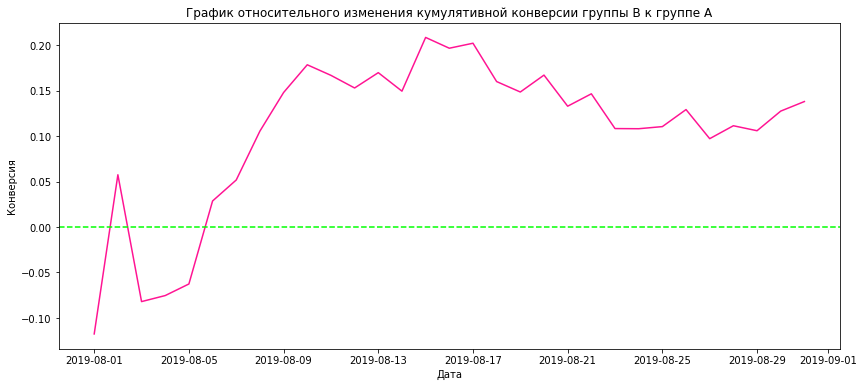

In [34]:
#строим график
plt.figure(figsize=(14,6))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, color='deeppink')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axhline(y=0, color='lime', linestyle='--')
plt.show()

*_<span style="color:blue">График демонстрирует стабильно лучшую конверсию в группе В практически с самого начала исследования.</span>_*

*_[К оглавлению](#chapter20)_*

##### Точечный график количества заказов по пользователям.<a class="anchor" id="chapter11"></a>

In [35]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})\
                         .rename(columns={'transactionId':'orders'})

In [36]:
ordersByUsers.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


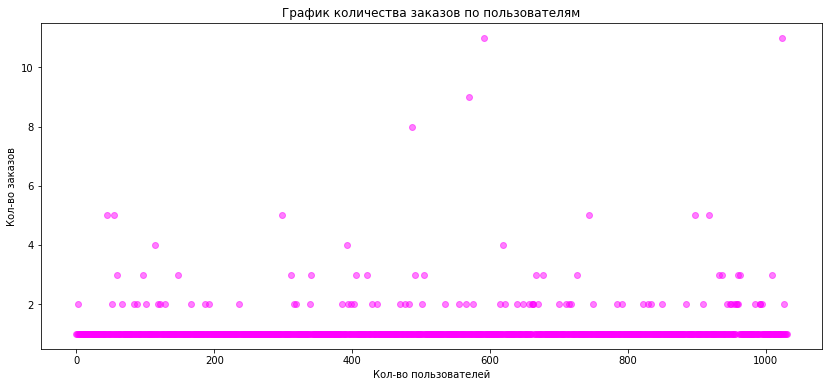

In [37]:
#строим scatter plot
plt.figure(figsize=(14,6))
plt.title('График количества заказов по пользователям')
plt.scatter(x=range(0, len(ordersByUsers)), y=ordersByUsers['orders'], alpha=0.5, color = 'fuchsia')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во заказов')
plt.show()

*_<span style="color:blue">Судя по графикам, подавляющее большинство пользователей совершает не более 1 заказа.  
А так же наблюдаются редкие выбросы с количеством покупок более 4 - такие значение встречаются крайне редко, поэтому их можно считать аномалиями.</span>_*

*_[К оглавлению](#chapter20)_*

##### 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей<a class="anchor" id="chapter12"></a>

In [38]:
print('95 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(ordersByUsers['orders'], [99])))

95 перцентиль: 2.00
99 перцентиль: 4.00


*_<span style="color:blue">Как и предполагалось, больше 2 заказов совершают только 5% пользователей. Так как 95% пользователей совершают не более 2 покупок, то будет правильным считать верхней границей покупок для каждого пользователя 2 покупки. Всё что находится за этими пределами можно считать выбросами и не учитывать в дальнейшем анализе.</span>_*

##### Точечный график стоимостей заказов.<a class="anchor" id="chapter13"></a>

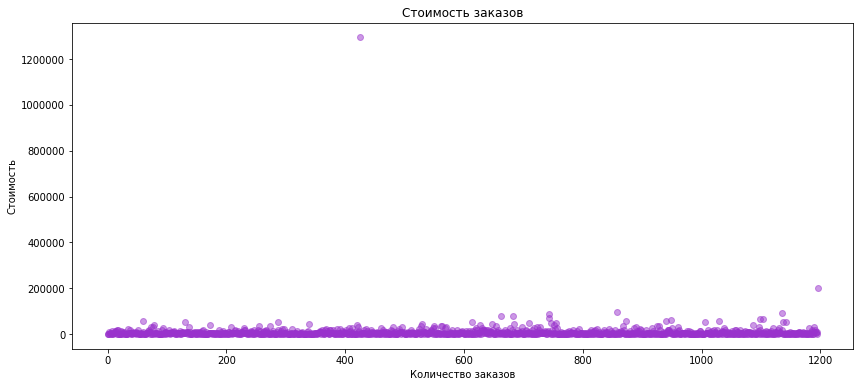

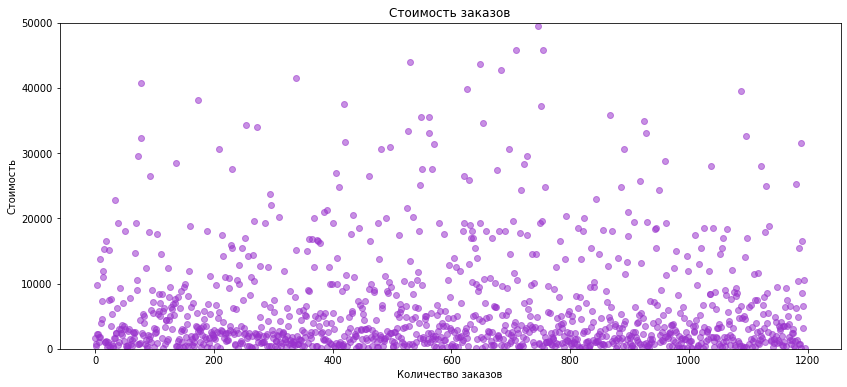

In [39]:
#сторим scatter
plt.figure(figsize=(14,6))
plt.title('Стоимость заказов')
plt.scatter(x=range(0,len(orders['revenue'])), y=orders['revenue'], color='darkorchid', alpha=0.5)
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость')
plt.show()
#границы оси Y ограничим до 50000
plt.figure(figsize=(14,6))       # Размер графика
plt.title('Стоимость заказов')
plt.scatter(x=range(0,len(orders['revenue'])), y=orders['revenue'], color='darkorchid', alpha=0.54)
plt.ylim(0, 50000)
plt.xlabel('Количество заказов') 
plt.ylabel('Стоимость')
plt.show()

*_<span style="color:blue">На точечных диаграммах рассеяния чётко видно, что основная часть заказов имеет стоимость менее 20000 рублей. Также имеются выбросы превышающие 120000 рублей.</span>_*

*_[К оглавлению](#chapter20)_*

##### 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов.<a class="anchor" id="chapter14"></a>

In [40]:
print('95 перцентиль: %.0f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.0f' % (np.percentile(orders['revenue'], [99])))

95 перцентиль: 28000
99 перцентиль: 58233


*_<span style="color:blue">Всего лишь 5% заказов дороже 28 т.р. Таким образом верхней границей для определения аномальных значений можно выбрать 28000 рублей. Все заказы стоимость которых превышает данное значение не будут учитываться в тесте/</span>_*

##### Статистическая значимость различий в конверсии между группами по «сырым» данным.<a class="anchor" id="chapter15"></a>

In [41]:
#данные о посещениях представителей группы А
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#данные о посещениях представителей группы В
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [42]:
#количество покупок в день и общая сумма покупок в день для группы А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#количество покупок в день и общая сумма покупок в день для группы В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [43]:
#кумулятивное количество посещений в день для группы А
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
#кумулятивное количество посещений в день для группы В
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [44]:
#кумулятивное количество покупок и суммой покупок в день для группы А
ordersACummulative = (
        ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
        .agg({'date' : 'max', 'ordersPerDateA' : 'sum', 'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date']))
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

#кумулятивное количество покупок и суммой покупок в день для группы В
ordersBCummulative = (
        ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
        .agg({'date' : 'max', 'ordersPerDateB' : 'sum', 'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date']))
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']


In [45]:
#объединяем ьаблицы
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
display(data.head(3))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803


In [46]:
#kоличество заказов для каждого пользователя А
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
#количество заказов для каждого пользователя B
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Сформулируем нулевую гипотезу для критерия Манна-Уитни:

>**На основании сырых данных конверсия между группами не различается**

И альтернативную:

>**На основании сырых данных конверсия между группами имеет различия**


Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [47]:
#если клиент ничего не купил, то значение покупок равно 0 группа А
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                                                            .sum() - len(ordersByUsersA['orders'])), 
                                                         name='orders')],axis=0)
#то же самое для группы В
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                                            .sum() - len(ordersByUsersB['orders'])), 
                                                         name='orders')],axis=0)
print('Относительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))

alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По сырым данным различия в конверсии между группами статистически ЗНАЧИМЫ')
else:
    print('По сырым данным различий в конверсии между группами НЕТ')

Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.008396177528376304
По сырым данным различия в конверсии между группами статистически ЗНАЧИМЫ


*_<span style="color:blue">Полученное значение статистической значимости **p-value** (0.008) меньше установленного значения alpha (0.05), что в свою очередь говорит о том, различия в конверсии между группами статистически значимы.</span>_*

*_[К оглавлению](#chapter20)_*

##### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.<a class="anchor" id="chapter16"></a>

Нулевая гипотеза:

>**На основании сырых данных средние чеки группы A и группы B не различаются**

Альтернативная:

>**На основании сырых данных средние чеки групп A и группы B имеют различия**



In [48]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По сырым данным разница в среднем чеке между группами статистически ЗНАЧИМА')
else:
    print('По сырым данным различий в среднем чеке между группами НЕТ')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.3646454927716229
По сырым данным различий в среднем чеке между группами НЕТ


*_<span style="color:blue">По полученным данным вывод о различии сделать сделать нельзя.</span>_*

##### Статистическая значимость различий в конверсии между группами по «очищенным» данным.<a class="anchor" id="chapter17"></a>

Ранее мы уже выяснили, что подавляющее большинство пользователей не делает более 2 заказов и сумма 1 покупки в большинстве случаев не превышает 28 т.р. Очистим данные от аномальных пользователей с превышающими данные лимиты значениями.

In [49]:
#зададим предельные кол-во заказов и сумму покупки для формирования списка аномальных пользователей
limit_orders = 2
limit_revenue = 28000

In [50]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>limit_orders]['userId'], 
                                ordersByUsersB[ordersByUsersB['orders']>limit_orders]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue']>limit_revenue]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

Кол-во аномальных пользователей: 74


Нулевая гипотеза для критерия Манна-Уитни:

>**На основании очищенных данных конверсия между группами не различается**

И альтернативная:

>**На основании очищенных данных конверсия между группами имеет различия**



In [51]:
#очищенные данные для группы А
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']
                                                           .isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                                          .sum() - len(ordersByUsersA['orders'])),name='orders')], axis=0)
#очищенные данные для группы В
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']
                                                           .isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                          .sum() - len(ordersByUsersB['orders'])),name='orders')], axis=0)
print('Относительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным различия в конверсии между группами статистически ЗНАЧИМЫ')
else:
    print('По очищенным данным различий в конверсии между группами НЕТ')

Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.173
P-value: 0.006521296371518379
По очищенным данным различия в конверсии между группами статистически ЗНАЧИМЫ


*_<span style="color:blue">Значение статистической значимости в конверсии между группами на очищенных данных практически идентично значению на "сырых" данных, но при этом конверсия в группе В на очищенных данных выше, чем в группе А. То есть на очищенных данных без аномалий конверсия в группе В стала ещё больше, чем была при первом анализе на сырых данных. В итоге конверсия в группе В в ходе теста стала выше - это знак того, что тестируемая гипотеза успешная.</span>_*

*_[К оглавлению](#chapter20)_*

##### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.<a class="anchor" id="chapter18"></a>

Нулевая гипотеза:

>**На основании очищенных данных средние чеки группы A и группы B не различаются**

Альтернативная:

>**На основании очищенных данных средние чеки групп A и группы B имеют различия**

In [52]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))

results = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным различия в среднем чеке между группами статистически ЗНАЧИМЫ')
else:
    print('По очищенным данным различий в среднем чеке между группами НЕТ')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020
P-value: 0.3692408756572825
По очищенным данным различий в среднем чеке между группами НЕТ


*_<span style="color:blue">Полученное значение статистической значимости в среднем чеке между группами по "очищенным" данным практически идентично значению полученному по "сырым" данным. Но благодаря избавлению от аномальных значений удалось выяснить, что средний чек в группе В на 2% ниже чем в группе А. Данный показатель на "очищенных" данных сильно отличается от значения полученного на "сырых" данных. В данном случае избавление от аномально высоких значений повлияло на итоговый результат.</span>_*

### Решение по результатам теста.<a class="anchor" id="chapter19"></a>

**_<span style="color:blue">Варианты принимаемых решений:</span>_**

- **_<span style="color:blue">Остановить тест, зафиксировать победу одной из групп.</span>_**
- **_<span style="color:blue">Остановить тест, зафиксировать отсутствие различий между группами.</span>_**
- **_<span style="color:blue">Продолжить тест.</span>_**  

**_<span style="color:blue">Итак. Выборка данных имеет корректный размер, проблемы подглядывания в результате сравнения групп во время проведения теста у нас не было. Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время лидировали в группе B. У нас на некоторое время возникли сомнения из-за резких колебаний на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей. Наши сомнения подтвердились на этот счет, т.к. после очистки разница между средними чеками стала минимальна. До и после очистки данных, показатель конверсии в группе B больше показателя в группе A - сначала на 14% до и на 17% после очистки данных. Данная разница показателей конверсии между группами и до и после очистки данных является статистически значимой, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B.</span>_**